In [78]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data exploration
df1 = pd.read_csv('Processed_Flipdata.csv')

In [3]:
df1

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [4]:
df1.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [5]:
# Displayed the data types of each feature
print(df1.dtypes)

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object


In [6]:
print(df1.describe())

       Unnamed: 0      Memory         RAM     Battery_     AI Lens  \
count  541.000000  541.000000  541.000000   541.000000  541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    0.062847   
std    182.359185   60.600694    1.984923   780.148862    0.242911   
min      0.000000   16.000000    2.000000   800.000000    0.000000   
25%    135.000000   64.000000    4.000000  5000.000000    0.000000   
50%    273.000000  128.000000    6.000000  5000.000000    0.000000   
75%    434.000000  128.000000    8.000000  5000.000000    0.000000   
max    642.000000  256.000000    8.000000  7000.000000    1.000000   

       Mobile Height  
count     541.000000  
mean       16.431201  
std         2.523553  
min         4.500000  
25%        16.510000  
50%        16.710000  
75%        16.940000  
max        41.940000  


In [7]:
# Displayed the unique values of each categorical feature
for col in df1.select_dtypes(include=['object']).columns:
    print(f'Unique values for {col}: {df1[col].unique()}')

Unique values for Model: ['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'micr

In [8]:
# Displayed the range of values for each numeric feature
for col in df1.select_dtypes(include=['int64', 'float64']).columns:
    print(f'Range of values for {col}: {df1[col].min()} - {df1[col].max()}')

Range of values for Unnamed: 0: 0 - 642
Range of values for Memory: 16 - 256
Range of values for RAM: 2 - 8
Range of values for Battery_: 800 - 7000
Range of values for AI Lens: 0 - 1
Range of values for Mobile Height: 4.5 - 41.94


In [9]:
# Data preprocessing
# Handled the missing values
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns


In [10]:
numeric_columns

Index(['Unnamed: 0', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height'], dtype='object')

In [11]:
# Replaced the missing values in numeric columns with the median
imputer = SimpleImputer(strategy='median')

In [12]:
imputer

SimpleImputer(strategy='median')

In [13]:
df1[numeric_columns] = imputer.fit_transform(df1[numeric_columns])

In [14]:
df1[numeric_columns]

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,0.0,64.0,4.0,6000.0,1.0,16.76
1,1.0,64.0,4.0,6000.0,1.0,16.76
2,2.0,128.0,8.0,5000.0,0.0,16.64
3,3.0,32.0,2.0,5000.0,0.0,16.56
4,4.0,128.0,8.0,5000.0,1.0,16.76
...,...,...,...,...,...,...
536,637.0,256.0,8.0,3900.0,0.0,15.49
537,638.0,32.0,2.0,3100.0,0.0,12.70
538,639.0,64.0,4.0,5000.0,0.0,16.76
539,641.0,128.0,8.0,5000.0,0.0,16.26


In [15]:
# Replaced missing values in categorical columns with the most frequent value
categorical_columns = df1.select_dtypes(include=['object']).columns

In [16]:
categorical_columns

Index(['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_',
       'Prize'],
      dtype='object')

In [17]:
imputer = SimpleImputer(strategy='most_frequent')

In [18]:
imputer

SimpleImputer(strategy='most_frequent')

In [19]:
df1[categorical_columns] = imputer.fit_transform(df1[categorical_columns])

In [20]:
df1[categorical_columns]

,Model,Colour,Rear Camera,Front Camera,Processor_,Prize
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,50MP,5MP,G37,"8,999"
...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,5MP,2MP,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core","38,999"


In [21]:
# Handled the outliers by using Z-score or IQR
z_scores = (df1[numeric_columns] - df1[numeric_columns].mean()) / df1[numeric_columns].std()

In [22]:
z_scores

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,-1.588687,-0.768157,-0.704013,1.446406,3.858005,0.130292
1,-1.583203,-0.768157,-0.704013,1.446406,3.858005,0.130292
2,-1.577720,0.287937,1.311178,0.164600,-0.258722,0.082740
3,-1.572236,-1.296203,-1.711609,0.164600,-0.258722,0.051039
4,-1.566752,0.287937,1.311178,0.164600,3.858005,0.130292
...,...,...,...,...,...,...
536,1.904419,2.400124,1.311178,-1.245388,-0.258722,-0.372967
537,1.909903,-1.296203,-1.711609,-2.270833,-0.258722,-1.478551
538,1.915387,-0.768157,-0.704013,0.164600,-0.258722,0.130292
539,1.926354,0.287937,1.311178,0.164600,-0.258722,-0.067841


In [23]:
df1[numeric_columns] = df1[numeric_columns].mask(z_scores.abs() > 3).fillna(df1[numeric_columns].median())

In [24]:
df1[numeric_columns]

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,0.0,64.0,4.0,6000.0,0.0,16.76
1,1.0,64.0,4.0,6000.0,0.0,16.76
2,2.0,128.0,8.0,5000.0,0.0,16.64
3,3.0,32.0,2.0,5000.0,0.0,16.56
4,4.0,128.0,8.0,5000.0,0.0,16.76
...,...,...,...,...,...,...
536,637.0,256.0,8.0,3900.0,0.0,15.49
537,638.0,32.0,2.0,3100.0,0.0,12.70
538,639.0,64.0,4.0,5000.0,0.0,16.76
539,641.0,128.0,8.0,5000.0,0.0,16.26


In [25]:
# Converted categorical variables into a suitable numerical format using one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')

In [26]:
encoder

OneHotEncoder(drop='first', sparse=False)

In [27]:
encoded_columns = pd.DataFrame(encoder.fit_transform(df1[categorical_columns]))

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
encoded_columns

,0,1,2,3,4,5,6,7,8,9,...,754,755,756,757,758,759,760,761,762,763
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df2 = pd.concat([df1, encoded_columns], axis=1)

In [30]:
df2

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,...,754,755,756,757,758,759,760,761,762,763
0,0.0,Infinix SMART 7,Night Black,64.0,4.0,6000.0,13MP,5MP,0.0,16.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,Infinix SMART 7,Azure Blue,64.0,4.0,6000.0,13MP,5MP,0.0,16.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,MOTOROLA G32,Mineral Gray,128.0,8.0,5000.0,50MP,16MP,0.0,16.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,POCO C50,Royal Blue,32.0,2.0,5000.0,8MP,5MP,0.0,16.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,Infinix HOT 30i,Marigold,128.0,8.0,5000.0,50MP,5MP,0.0,16.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,637.0,SAMSUNG Galaxy S23 5G,Cream,256.0,8.0,3900.0,50MP,12MP,0.0,15.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,638.0,LAVA Z21,Cyan,32.0,2.0,3100.0,5MP,2MP,0.0,12.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,639.0,Tecno Spark 8T,Turquoise Cyan,64.0,4.0,5000.0,50MP,8MP,0.0,16.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539,641.0,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8.0,5000.0,50MP,32MP,0.0,16.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df3 = df2.drop(categorical_columns, axis=1)

In [32]:
df3

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,0,1,2,3,...,754,755,756,757,758,759,760,761,762,763
0,0.0,64.0,4.0,6000.0,0.0,16.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,64.0,4.0,6000.0,0.0,16.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,128.0,8.0,5000.0,0.0,16.64,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,32.0,2.0,5000.0,0.0,16.56,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,128.0,8.0,5000.0,0.0,16.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,637.0,256.0,8.0,3900.0,0.0,15.49,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,638.0,32.0,2.0,3100.0,0.0,12.70,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,639.0,64.0,4.0,5000.0,0.0,16.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539,641.0,128.0,8.0,5000.0,0.0,16.26,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Normalized the numeric columns
scaler = StandardScaler()

In [36]:
df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])

In [34]:
df3

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,0,1,2,3,...,754,755,756,757,758,759,760,761,762,763
0,0.0,64.0,4.0,6000.0,0.0,16.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,64.0,4.0,6000.0,0.0,16.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,128.0,8.0,5000.0,0.0,16.64,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,32.0,2.0,5000.0,0.0,16.56,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,128.0,8.0,5000.0,0.0,16.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,637.0,256.0,8.0,3900.0,0.0,15.49,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,638.0,32.0,2.0,3100.0,0.0,12.70,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,639.0,64.0,4.0,5000.0,0.0,16.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539,641.0,128.0,8.0,5000.0,0.0,16.26,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Displayed the preprocessed dataset
print(df3.head())

   Unnamed: 0    Memory       RAM  Battery_  AI Lens  Mobile Height    0    1  \
0   -1.590157 -0.768868 -0.704665  2.353415      0.0       0.214794  0.0  0.0   
1   -1.584668 -0.768868 -0.704665  2.353415      0.0       0.214794  0.0  0.0   
2   -1.579180  0.288203  1.312392  0.043261      0.0      -0.099908  0.0  0.0   
3   -1.573691 -1.297403 -1.713193  0.043261      0.0      -0.309709  0.0  0.0   
4   -1.568202  0.288203  1.312392  0.043261      0.0       0.214794  0.0  0.0   

     2    3  ...  754  755  756  757  758  759  760  761  762  763  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 770 columns]


In [38]:
# Feature extraction
#Computation of the correlation matrix 
corr_matrix = df3.corr()

In [39]:
corr_matrix

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,0,1,2,3,...,754,755,756,757,758,759,760,761,762,763
Unnamed: 0,1.000000,0.120579,0.084103,-0.261299,NaN,-0.172261,0.080612,0.128680,-0.036087,0.069386,...,0.030774,0.018318,0.016838,0.053921,-0.045850,-0.074829,0.076996,0.082501,0.017123,-0.014448
Memory,0.120579,1.000000,0.625284,-0.125969,NaN,0.157667,-0.033087,0.021521,0.021521,0.021521,...,0.012402,-0.046835,-0.033087,-0.055831,-0.083078,-0.066358,-0.046835,-0.033087,-0.128622,-0.095128
RAM,0.084103,0.625284,1.000000,-0.226654,NaN,0.101320,0.056476,-0.040068,0.047794,0.098002,...,-0.030324,-0.042924,-0.030324,-0.052024,-0.094913,-0.060817,-0.058283,-0.030324,-0.112047,-0.042924
Battery_,-0.261299,-0.125969,-0.226654,1.000000,NaN,0.515275,-0.215356,-0.113558,-0.093374,-0.122701,...,0.001862,0.002635,0.001862,-0.094569,0.157511,0.153269,0.002635,0.001862,0.039174,0.002635
AI Lens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,-0.074829,-0.066358,-0.060817,0.153269,NaN,0.018538,-0.003714,-0.006445,-0.006445,-0.006445,...,-0.003714,-0.005257,-0.003714,-0.003714,-0.012434,1.000000,-0.005257,-0.003714,-0.017769,-0.005257
760,0.076996,-0.046835,-0.058283,0.002635,NaN,-0.011677,-0.002621,-0.004549,-0.004549,-0.004549,...,-0.002621,-0.003711,-0.002621,-0.002621,-0.008776,-0.005257,1.000000,-0.002621,-0.012541,-0.003711
761,0.082501,-0.033087,-0.030324,0.001862,NaN,0.009243,-0.001852,-0.003213,-0.003213,-0.003213,...,-0.001852,-0.002621,-0.001852,-0.001852,-0.006200,-0.003714,-0.002621,1.000000,-0.008860,-0.002621
762,0.017123,-0.128622,-0.112047,0.039174,NaN,-0.001672,-0.008860,-0.015374,-0.015374,-0.015374,...,-0.008860,-0.012541,-0.008860,-0.008860,-0.029661,-0.017769,-0.012541,-0.008860,1.000000,-0.012541


In [40]:
# Feature selection
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Read the data set
data1 = pd.read_csv('Processed_Flipdata.csv')

In [42]:
data1

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [44]:
# Droping of any non-numeric columns
data_numeric = data1.select_dtypes(include=['number'])

In [45]:
data_numeric

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,0,64,4,6000,1,16.76
1,1,64,4,6000,1,16.76
2,2,128,8,5000,0,16.64
3,3,32,2,5000,0,16.56
4,4,128,8,5000,1,16.76
...,...,...,...,...,...,...
536,637,256,8,3900,0,15.49
537,638,32,2,3100,0,12.70
538,639,64,4,5000,0,16.76
539,641,128,8,5000,0,16.26


In [46]:
# Filling of any missing values with Not applicable
data_filled = data_numeric.fillna(data_numeric.mean())

In [47]:
data_filled

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,0,64,4,6000,1,16.76
1,1,64,4,6000,1,16.76
2,2,128,8,5000,0,16.64
3,3,32,2,5000,0,16.56
4,4,128,8,5000,1,16.76
...,...,...,...,...,...,...
536,637,256,8,3900,0,15.49
537,638,32,2,3100,0,12.70
538,639,64,4,5000,0,16.76
539,641,128,8,5000,0,16.26


In [49]:
# Defining of features and target variable
X = data_filled.drop(columns=['Memory'])
y = data_filled['RAM']

In [50]:
# Initialization of RandomForestClassifier
model = RandomForestClassifier()

In [51]:
model

RandomForestClassifier()

In [52]:
# model fitting
model.fit(X, y)

RandomForestClassifier()

In [53]:
# Getting the feature importances
feature_importances = model.feature_importances_

In [54]:
feature_importances

array([0.05063198, 0.85279092, 0.03952054, 0.00249745, 0.0545591 ])

In [55]:
# Sorting of feature importances
sorted_indices = feature_importances.argsort()[::-1]

In [56]:
sorted_indices

array([1, 4, 0, 2, 3], dtype=int64)

In [57]:
# Selecting of top 10 most important features
top_features = X.columns[sorted_indices][:10]

In [58]:
top_features

Index(['RAM', 'Mobile Height', 'Unnamed: 0', 'Battery_', 'AI Lens'], dtype='object')

In [59]:
# Ploting of feature importances
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

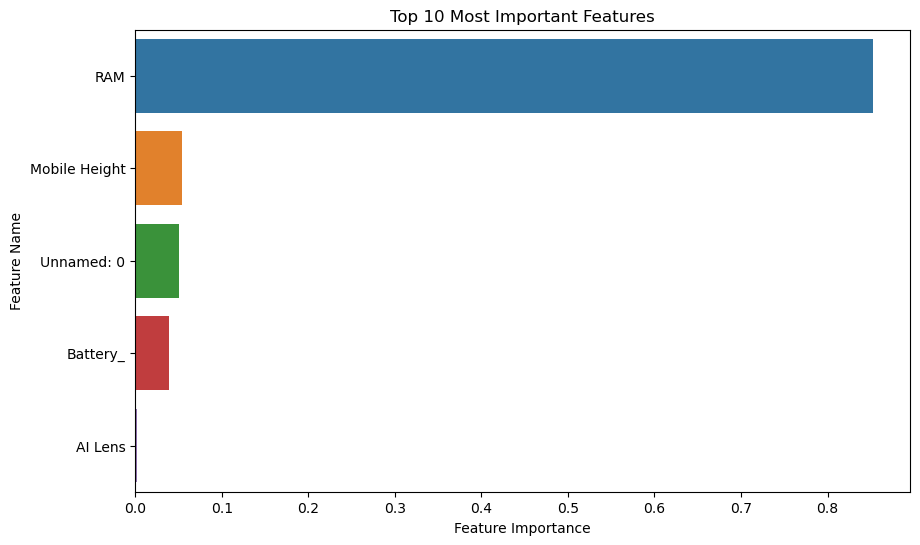

In [63]:
# Ploting of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices][:10], y=top_features)
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [64]:
# model building task
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [66]:
# Droping of any non-numeric columns
data_numeric1 = data1.select_dtypes(include=['number'])

In [67]:
data_numeric1

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,0,64,4,6000,1,16.76
1,1,64,4,6000,1,16.76
2,2,128,8,5000,0,16.64
3,3,32,2,5000,0,16.56
4,4,128,8,5000,1,16.76
...,...,...,...,...,...,...
536,637,256,8,3900,0,15.49
537,638,32,2,3100,0,12.70
538,639,64,4,5000,0,16.76
539,641,128,8,5000,0,16.26


In [68]:
# Filling of any missing values with Not applicable
data_filled = data_numeric1.fillna(data_numeric.mean())

In [69]:
data_filled

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
0,0,64,4,6000,1,16.76
1,1,64,4,6000,1,16.76
2,2,128,8,5000,0,16.64
3,3,32,2,5000,0,16.56
4,4,128,8,5000,1,16.76
...,...,...,...,...,...,...
536,637,256,8,3900,0,15.49
537,638,32,2,3100,0,12.70
538,639,64,4,5000,0,16.76
539,641,128,8,5000,0,16.26


In [70]:
# Defining of features and target variable
X = data_filled.drop(columns=['Mobile Height'])
y = data_filled['Battery_']

In [71]:
 # Spliting of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Initialization of RandomForestRegressor
model = RandomForestRegressor()

In [73]:
model

RandomForestRegressor()

In [74]:
# Fiting of the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
# Predicttion of the prices
y_pred = model.predict(X_test)

In [76]:
y_pred

array([6000.  , 5000.  , 5000.  , 5000.  , 5000.  , 5000.  , 5000.  ,
       5000.  , 4500.  , 5000.  , 5000.  , 4402.03, 5000.  , 5000.  ,
       4980.2 , 5000.  , 5000.  , 5000.  , 4500.  , 4501.  , 5000.  ,
       5000.  , 5000.  , 5000.  , 4500.  , 5000.  , 5000.  , 5000.  ,
       6000.  , 5000.  , 5000.  , 5000.  , 1006.4 , 5000.  , 4206.55,
       4317.65, 5000.  , 5000.  , 5000.  , 6000.  , 5000.  , 4616.3 ,
       5000.  , 5000.  , 5000.  , 5000.  , 5000.  , 5000.  , 5000.  ,
       5000.  , 5000.  , 4501.  , 5152.  , 5000.  , 5000.  , 4501.  ,
       5000.  , 4500.  , 5000.  , 5000.  , 5000.  , 5000.  , 5000.  ,
       4043.25, 5000.  , 5000.  , 5000.  , 5082.4 , 6000.  , 6010.  ,
       5000.  , 5000.  , 5000.  , 5000.  , 5000.  , 1187.  , 5000.  ,
       5000.  , 4980.2 , 5000.  , 5000.  , 5000.  , 5000.  , 5000.  ,
       6000.  , 5000.  , 4201.3 , 5000.  , 5000.  , 6000.  , 6010.  ,
       5000.  , 4398.73, 5000.  , 5000.  , 5000.  , 4202.3 , 5000.  ,
       4501.  , 5000

In [77]:
# Evaluation of the model using mean sqaure error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1186.4438651376147


In [79]:
# Evaluation of the model using root mean sqaure error
rmse = np.sqrt(np.mean((y_test - y_pred)**2))

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 34.44479445631248
